In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block -- MOST IMPORTANT TO CHECK VLAUES

In [63]:
evaluate_last_X_years = False
X=7
currency_pair = 'CADUSD=X'
numbers_in_currency = 'CAD'
share_name = 'EMA.TO'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount
## Pull historical USD national currency rates to dividend & calculate historical dividend in USD

In [64]:
# ticker_share = yf.Ticker(share_name)
# dividend = ticker_share.history(period='max', interval="1wk")
# dividend = dividend[dividend['Dividends'] > 0]
# dividend = dividend.rename(columns={'Dividends': 'local_amount'})

# dividend['real_date'] = dividend.index 
# dividend['real_date'] = dividend['real_date'].dt.tz_localize(None)

# dividend = dividend[['real_date', 'local_amount']]

# dividend['usd_rate'] = daily_price(ticker=currency_pair, end=dividend['real_date'], days_earlier=3)
# dividend['currency'] = [currency_pair.split(sep='=')[0] for x in range(len(dividend))]
# dividend['usd_dividend'] = dividend['local_amount'] / dividend['usd_rate']

# dividend.head()

## Extend your input statement table with historical dividend data and calculate share prices!

# 1.2. Raw input statement data

In [65]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [66]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2013-03-31,638,-20,658,0,0,-460,-29,169,-39,...,-113,-177,31,-50,15,111,106,4,25,132
1,2013-06-30,507,-11,496,0,0,-414,-33,49,-6,...,-34,-115,-4,-49,137,-135,-51,5,-20,132
2,2013-09-30,491,-8,484,0,0,-398,-39,46,-7,...,-31,-114,2,-53,15,91,56,-4,140,132
3,2013-12-31,594,-14,581,0,0,-518,-28,34,-3,...,-427,-516,-9,-53,14,298,251,5,-131,132
4,2014-03-31,1050,-10,1041,0,0,-722,-38,280,-67,...,-2,-83,-8,-56,260,-184,12,4,79,143


## Calculate date when quaterly reports could be available

In [67]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [68]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
38,2022-09-30,2022-10-21,266,1835,0,1835,184,526,1225,722,...,0,39804,2071,2514,575,7690,15285,28679,282,-663
39,2022-12-31,2023-02-11,266,2358,0,2358,499,310,1503,769,...,0,39742,2025,2726,574,7287,15744,28315,-42,-892
40,2023-03-31,2023-04-21,266,2433,0,2433,576,280,1156,735,...,0,38817,1304,2833,682,5908,15807,26940,453,-637
41,2023-06-30,2023-07-21,266,1418,0,1418,44,313,1032,826,...,0,38472,1283,2852,96,5267,16441,26887,498,-714
42,2023-09-30,2023-10-21,266,1740,0,1740,118,254,1111,840,...,0,39147,1424,2666,676,5873,16243,27377,867,-712


## Pull historical average USD national currency rates and add to the dataframe

In [69]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
38,2022-09-30,2022-10-21,266,1835,0,1835,184,526,1225,722,...,39804,2071,2514,575,7690,15285,28679,282,-663,0.766996
39,2022-12-31,2023-02-11,266,2358,0,2358,499,310,1503,769,...,39742,2025,2726,574,7287,15744,28315,-42,-892,0.736786
40,2023-03-31,2023-04-21,266,2433,0,2433,576,280,1156,735,...,38817,1304,2833,682,5908,15807,26940,453,-637,0.739699
41,2023-06-30,2023-07-21,266,1418,0,1418,44,313,1032,826,...,38472,1283,2852,96,5267,16441,26887,498,-714,0.744481
42,2023-09-30,2023-10-21,266,1740,0,1740,118,254,1111,840,...,39147,1424,2666,676,5873,16243,27377,867,-712,0.745795


## Convert USD values related to IS, BS, CFS to national currency

In [70]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
38,2022-09-30,2022-10-21,266,1835,0,1835,184,526,1225,722,...,39804,2071,2514,575,7690,15285,28679,282,-663,0.766996
39,2022-12-31,2023-02-11,266,2358,0,2358,499,310,1503,769,...,39742,2025,2726,574,7287,15744,28315,-42,-892,0.736786
40,2023-03-31,2023-04-21,266,2433,0,2433,576,280,1156,735,...,38817,1304,2833,682,5908,15807,26940,453,-637,0.739699
41,2023-06-30,2023-07-21,266,1418,0,1418,44,313,1032,826,...,38472,1283,2852,96,5267,16441,26887,498,-714,0.744481
42,2023-09-30,2023-10-21,266,1740,0,1740,118,254,1111,840,...,39147,1424,2666,676,5873,16243,27377,867,-712,0.745795


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [71]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [72]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [73]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [74]:

obj = yf.Ticker(share_name)
share_price = obj.history(interval="1wk", start=data.date.min(), end=pd.Timestamp.now())
# add new date column due to pd.merge_asof match
share_price['real_date'] = share_price.index
# remove localization (timezone) to let merge the two columns
share_price['real_date'] = share_price['real_date'].dt.tz_localize(None)
# add share price column and keep the date and share prices
share_price['share_price'] = share_price['Close']
share_price = share_price[['real_date', 'share_price']]

share_price.tail()

,real_date,share_price
Date,,
2024-01-15 00:00:00-05:00,2024-01-15,48.653469
2024-01-22 00:00:00-05:00,2024-01-22,48.121410
2024-01-29 00:00:00-05:00,2024-01-29,47.707588
2024-02-05 00:00:00-05:00,2024-02-05,46.750000
2024-02-12 00:00:00-05:00,2024-02-12,48.380001


## Merge the statement dataset with share prices

In [75]:
merged_nat_curr = pd.merge_asof(left=share_price, right=ratios_nat_curr, on='real_date', direction='backward')
# drop rows with np.Nan and reset index
merged_nat_curr = merged_nat_curr.dropna()
merged_nat_curr = merged_nat_curr.reset_index(drop=True)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2013-04-22,22.252903,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
1,2013-04-29,22.168459,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
2,2013-05-06,22.204193,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
3,2013-05-13,22.319902,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
4,2013-05-20,22.045856,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [76]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
0,2013-04-22,22.252903,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631,5.648814,1.353633,1.151012,4.707345
1,2013-04-29,22.168459,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631,5.627378,1.348496,1.146644,4.689482
2,2013-05-06,22.204193,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631,5.636449,1.350670,1.148493,4.697041
3,2013-05-13,22.319902,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631,5.665821,1.357708,1.154478,4.721518
4,2013-05-20,22.045856,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,1.096567,...,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631,5.596256,1.341038,1.140303,4.663547


# Calculate Dividend yield and currency-share price correlation

In [77]:
obj = yf.Ticker(currency_pair)
obj2 = yf.Ticker(share_name)
usd_nat_curr = obj.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
usd_nat_curr['date'] = usd_nat_curr.index
usd_nat_curr['date'] = usd_nat_curr['date'].dt.tz_localize(None)
usd_nat_curr['currency_rate'] = usd_nat_curr['Close']

In [78]:
share_all_price = obj2.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
share_all_price['date'] = share_all_price.index
share_all_price['date'] = share_all_price['date'].dt.tz_localize(None)
share_all_price['share_price'] = share_all_price['Close']
share_all_price['dividend_yield'] = share_all_price['Dividends'] * 100 / share_all_price['Close']

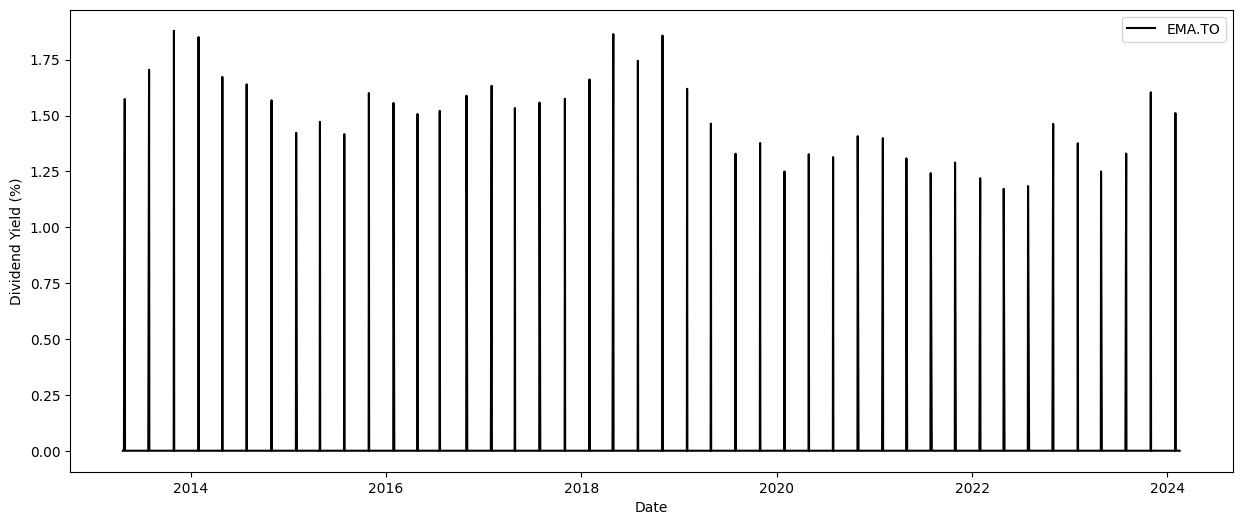

In [79]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(share_all_price.index, share_all_price['dividend_yield'], color='k', label=share_name)

ax1.set_xlabel('Date')
ax1.set_ylabel('Dividend Yield (%)', color='k')

plt.legend()
plt.show()

In [80]:
share_price_currency_rate_correlation = pd.merge_asof(left=usd_nat_curr, right=share_all_price, on='date')
share_price_currency_rate_correlation.index = share_price_currency_rate_correlation['date']
share_price_currency_rate_correlation = share_price_currency_rate_correlation[['currency_rate', 'share_price']]

share_price_currency_rate_correlation.corr()['share_price']

currency_rate   -0.614201
share_price      1.000000
Name: share_price, dtype: float64

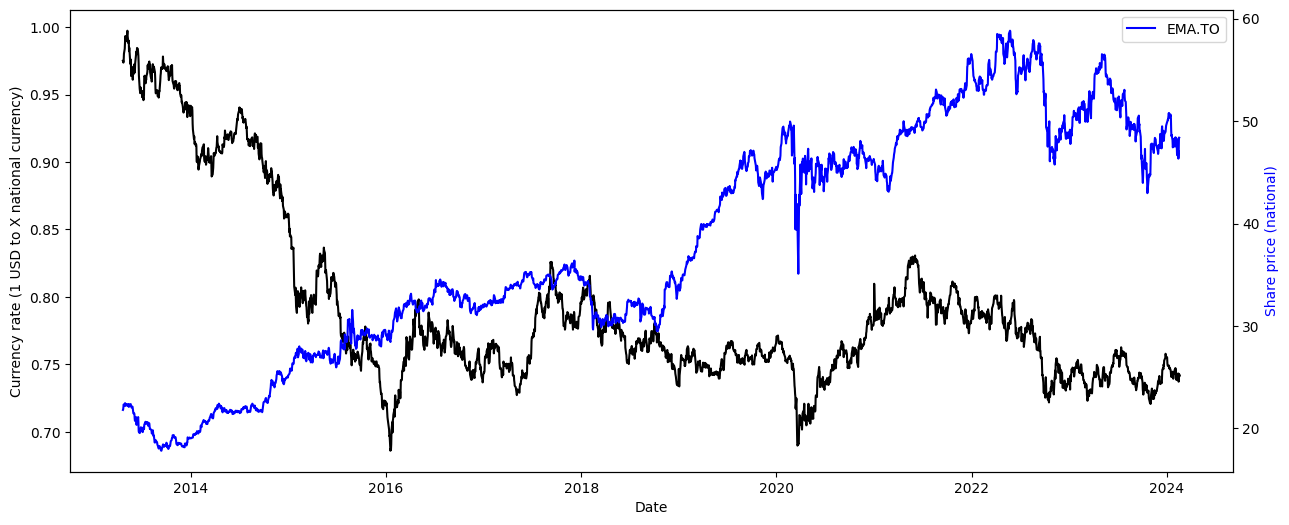

In [81]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()
ax1.plot(usd_nat_curr.index, usd_nat_curr['Close'], color='k', label='USD / national currency')
ax2.plot(share_all_price.index, share_all_price['Close'], color='b', label=share_name)

ax1.set_xlabel('Date')
ax1.set_ylabel('Currency rate (1 USD to X national currency)', color='k')
ax2.set_ylabel('Share price (national)', color='b')

plt.legend()
plt.show()

# Share price and value ratios

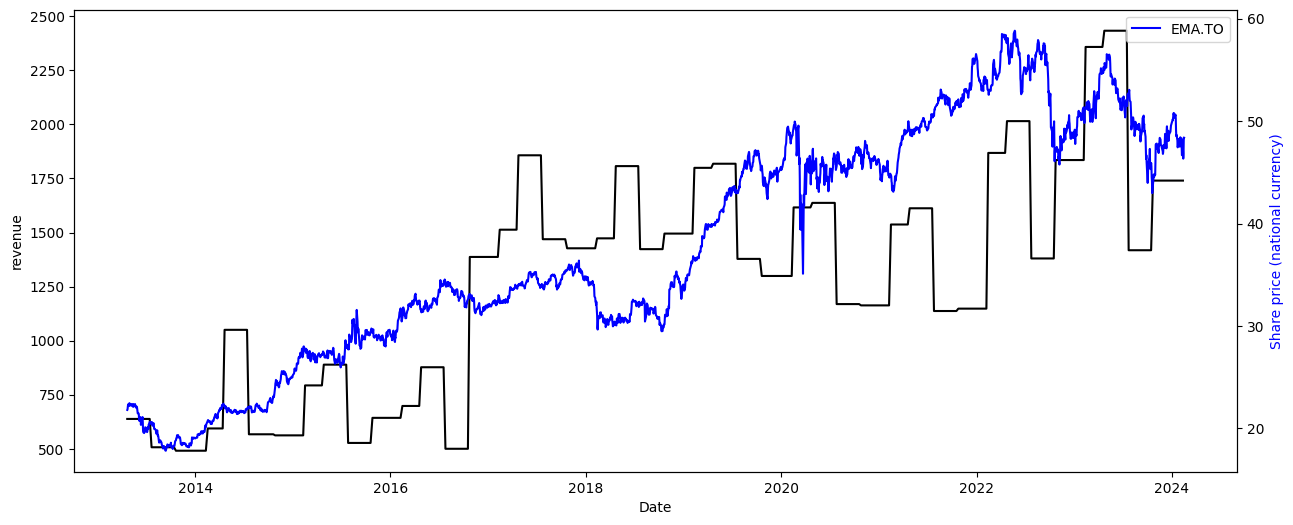

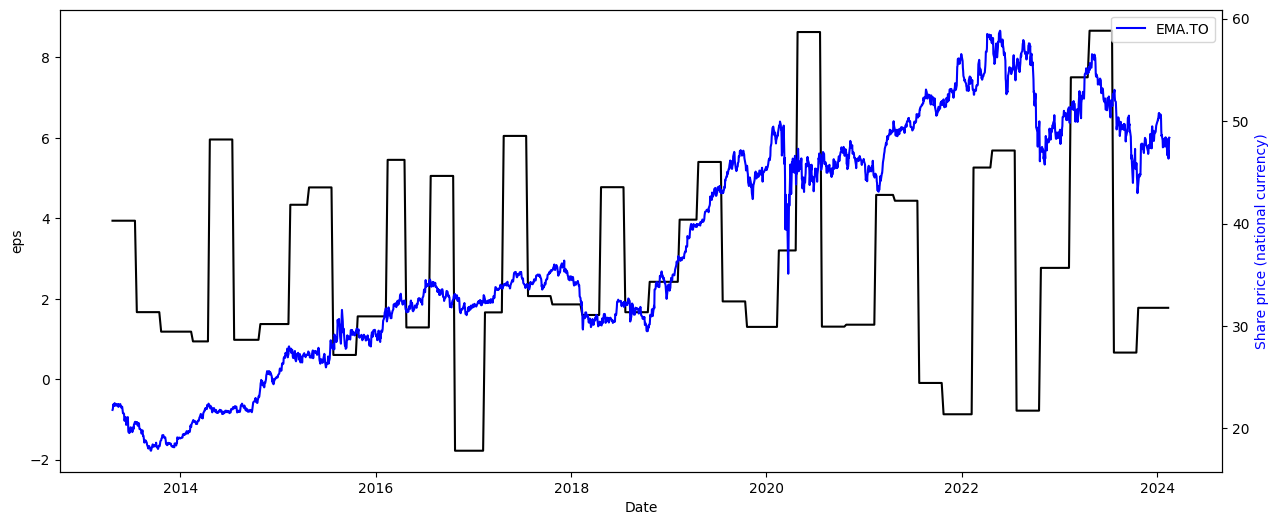

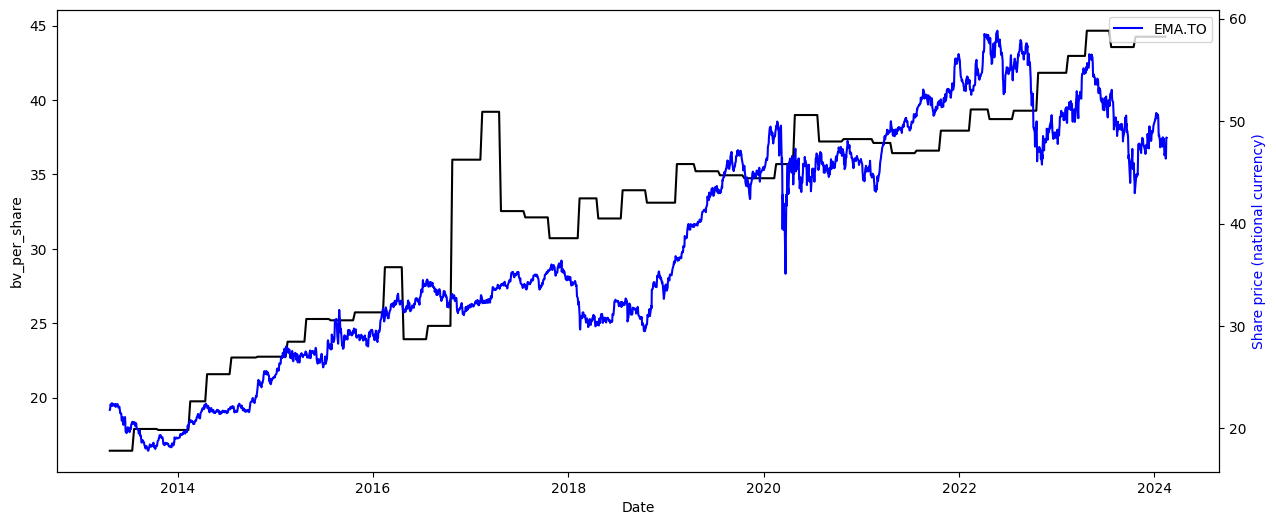

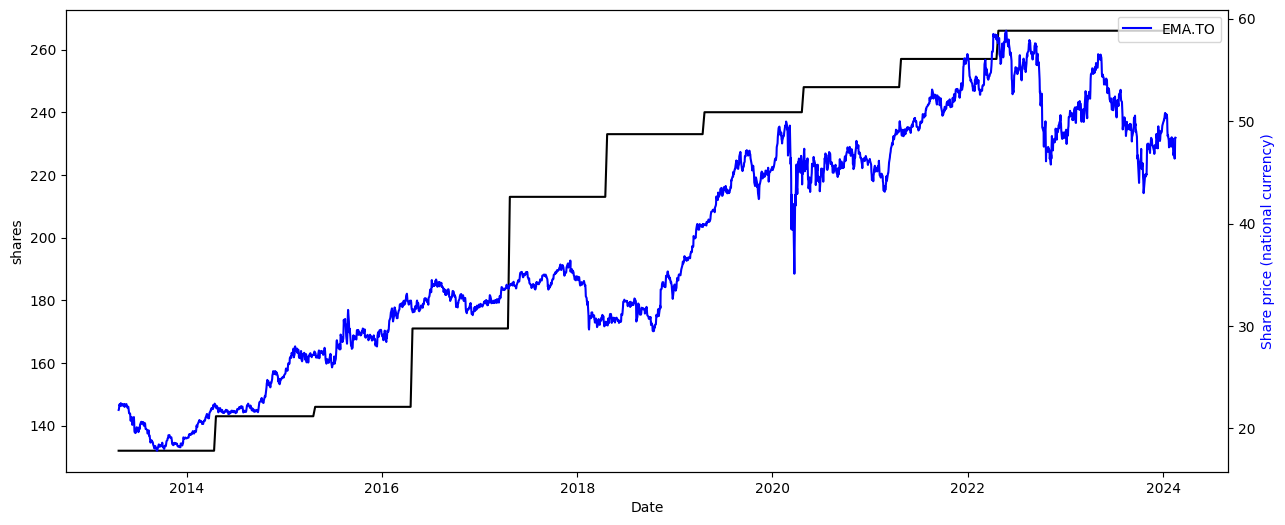

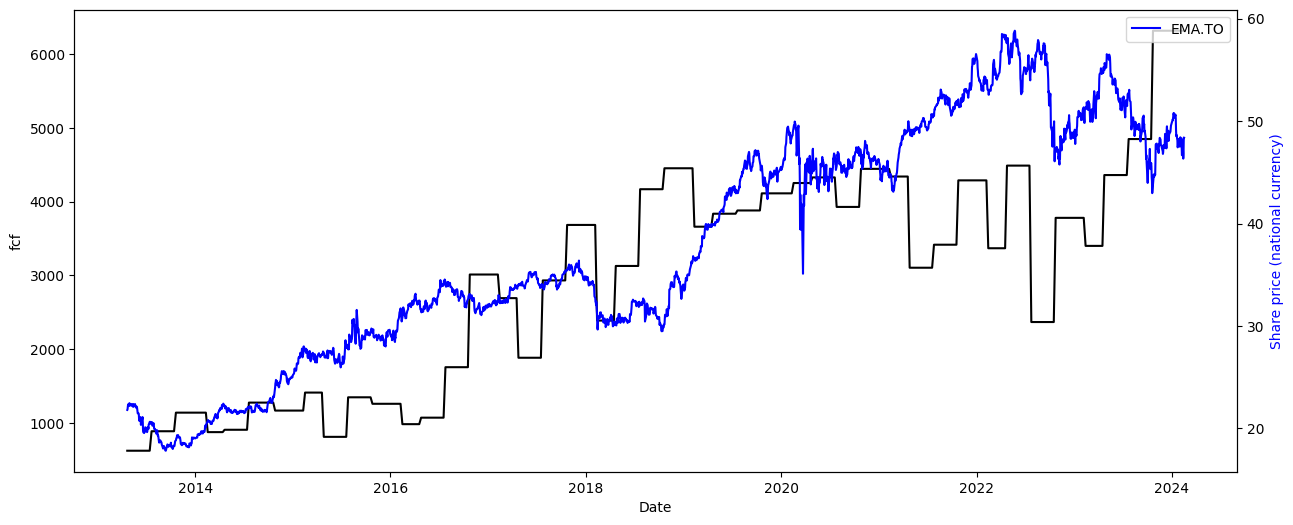

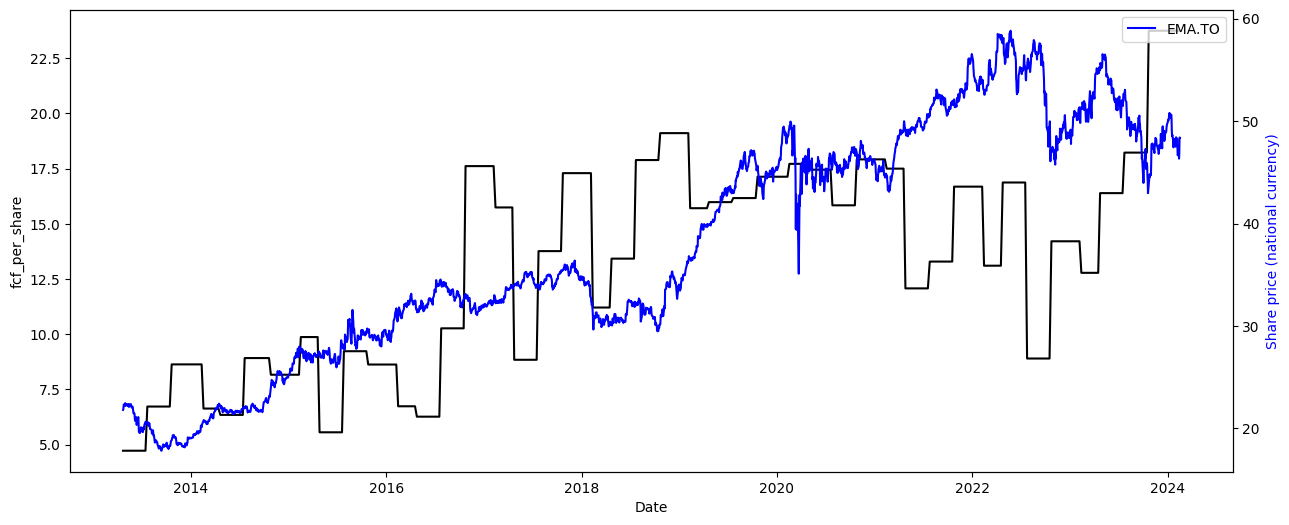

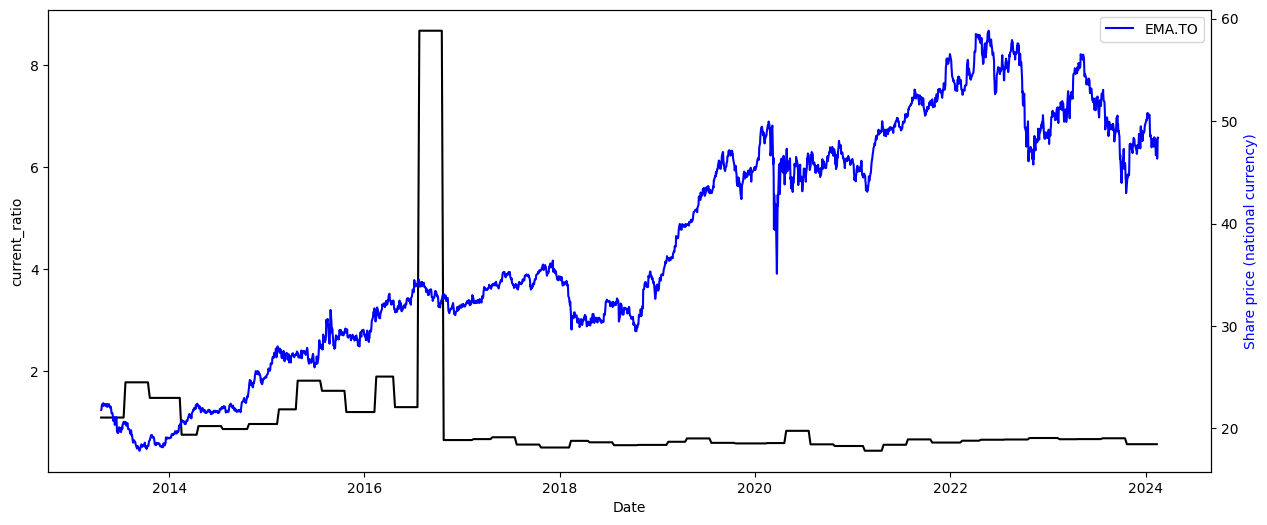

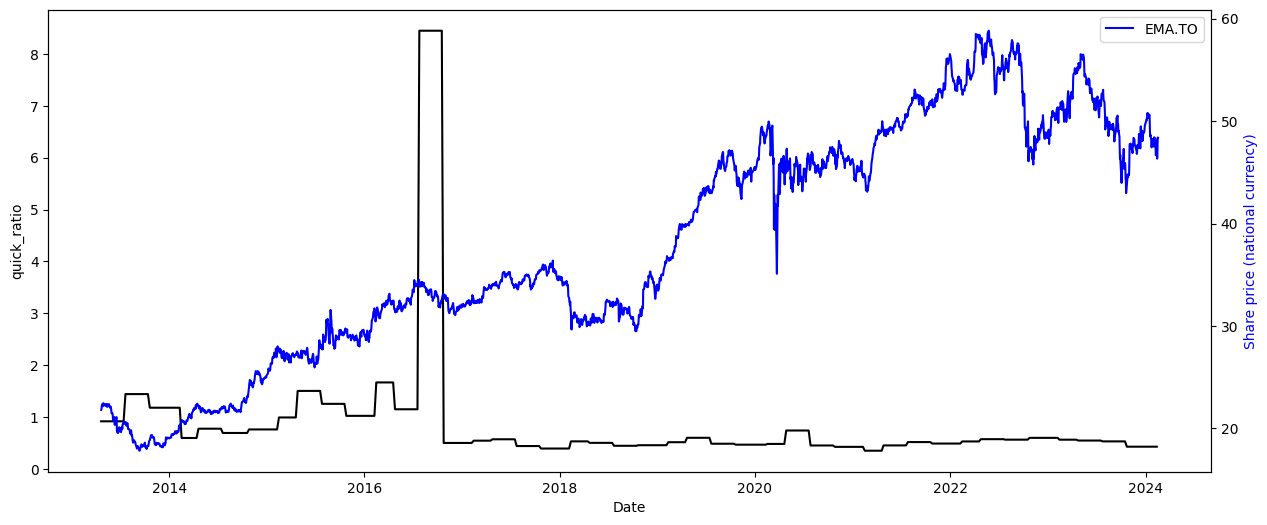

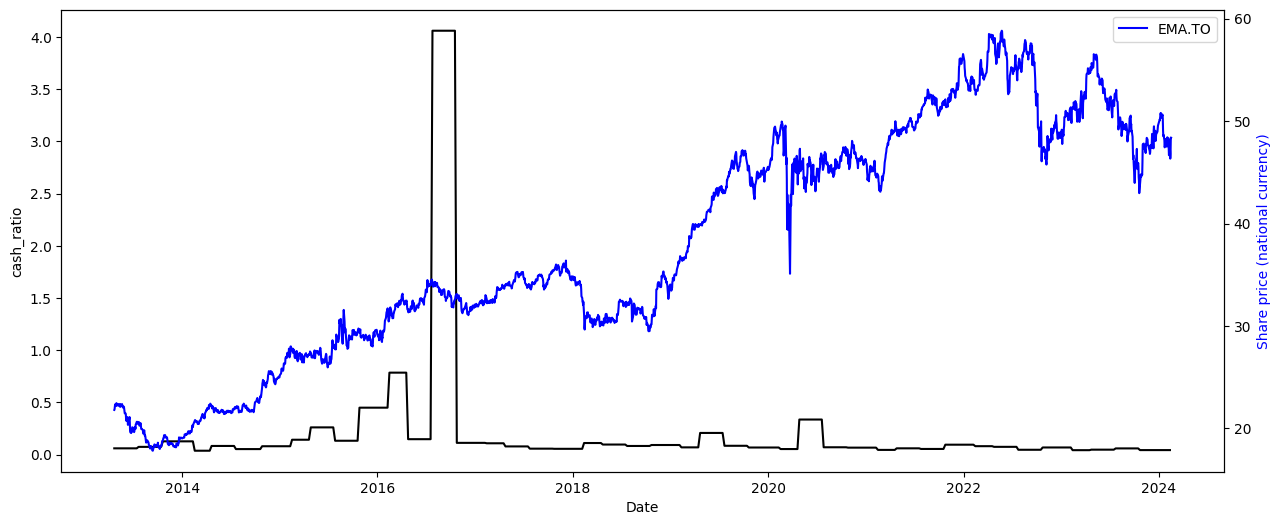

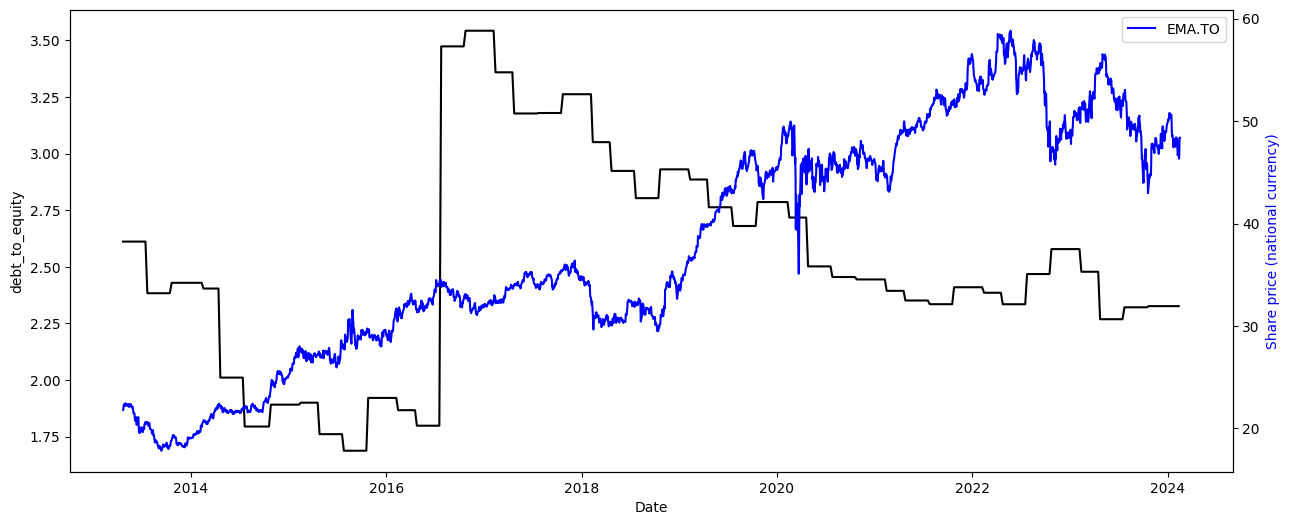

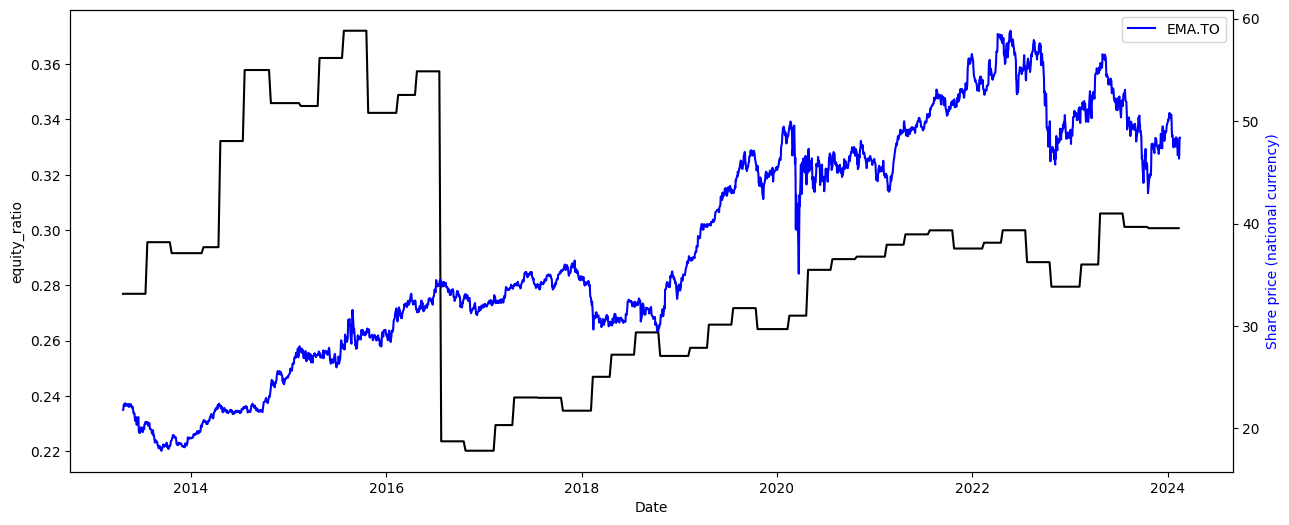

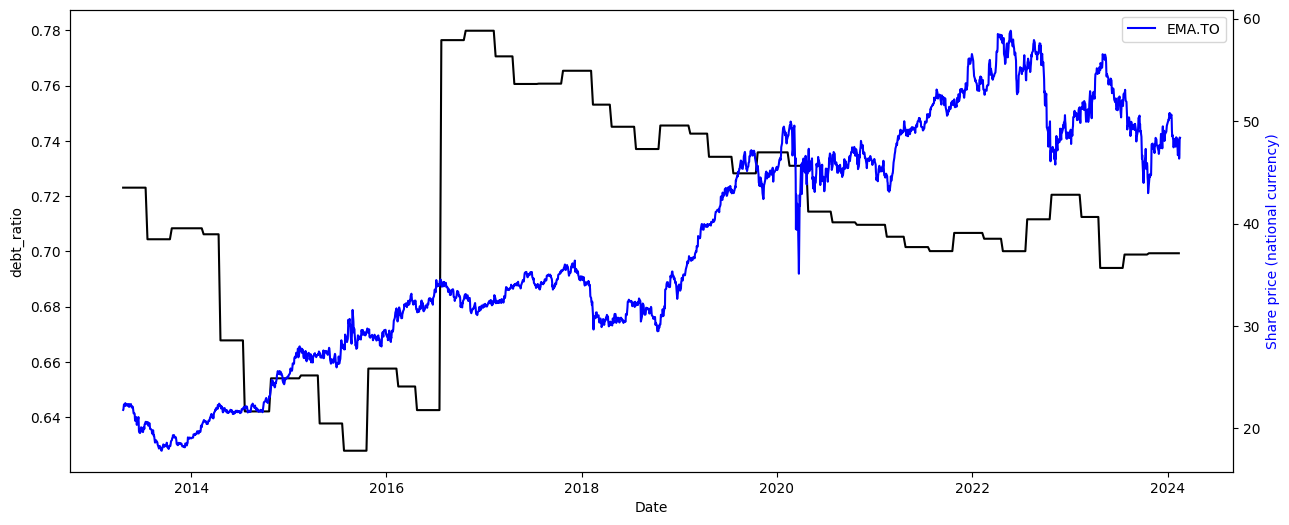

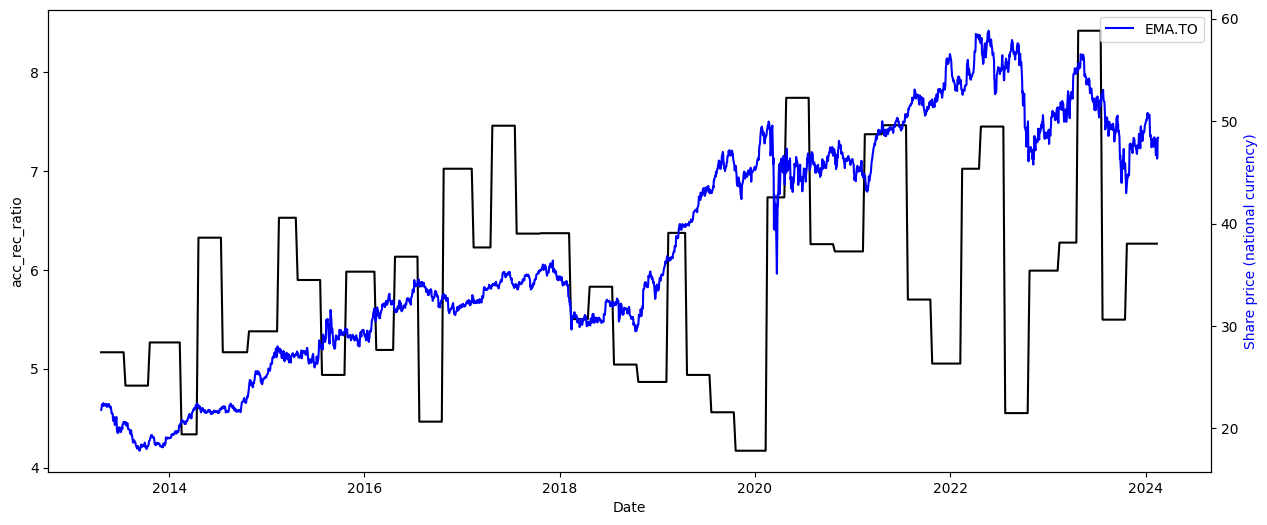

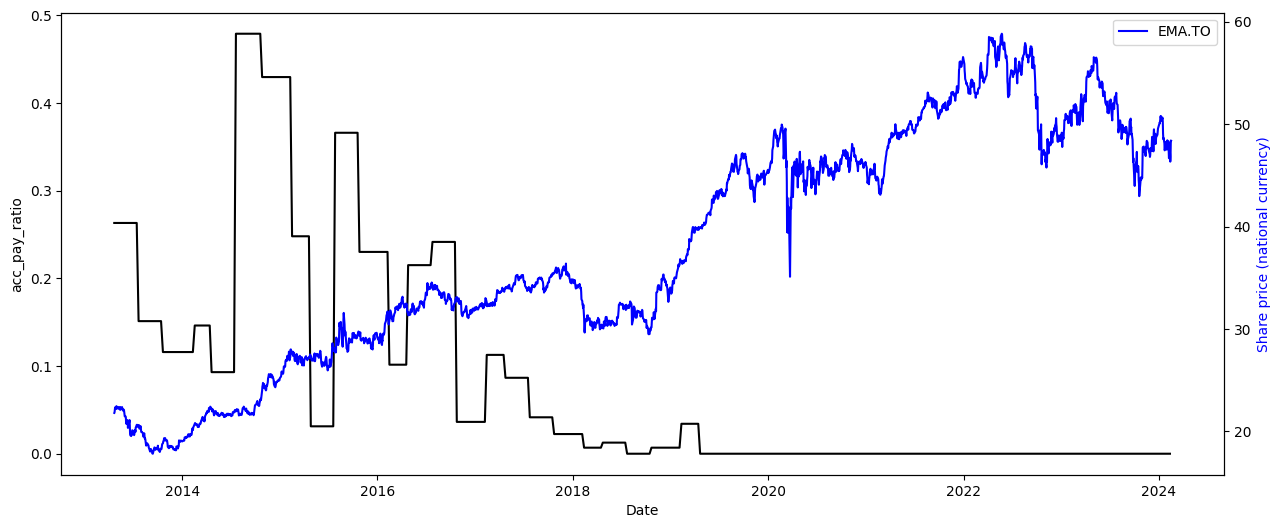

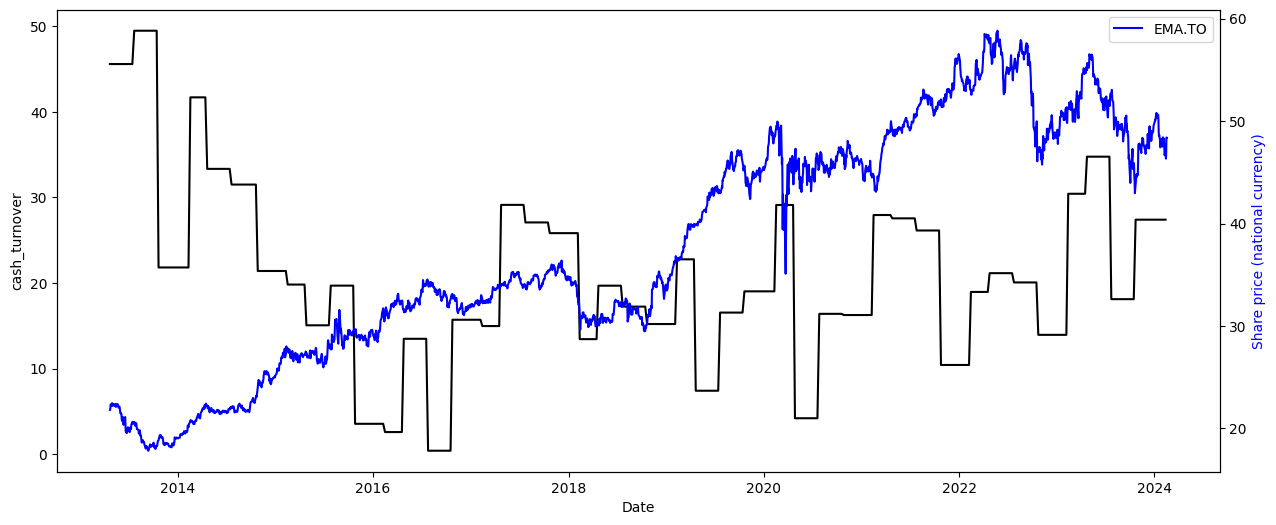

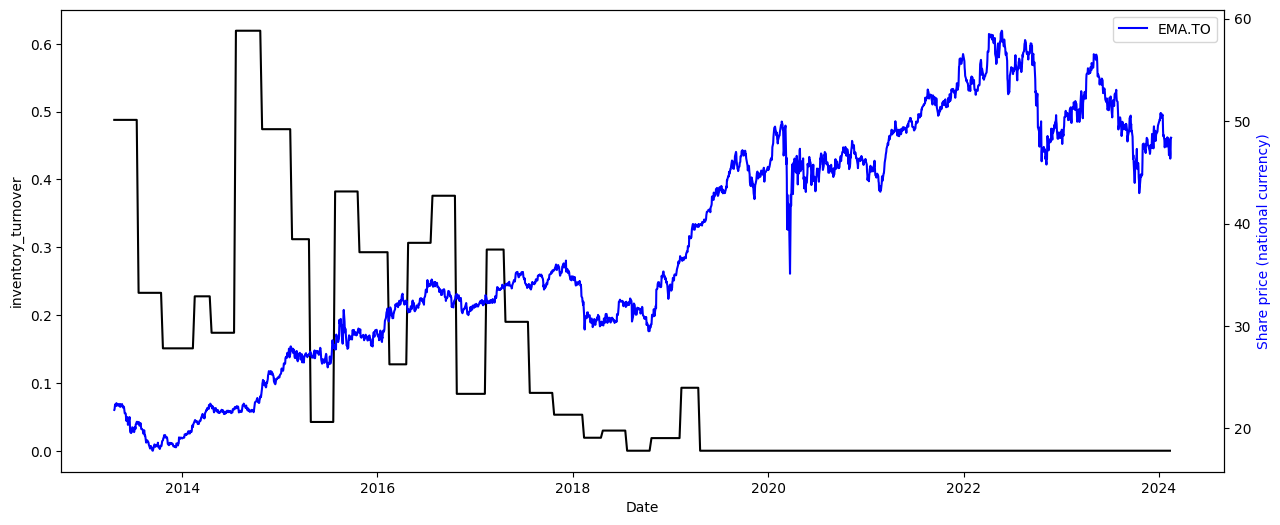

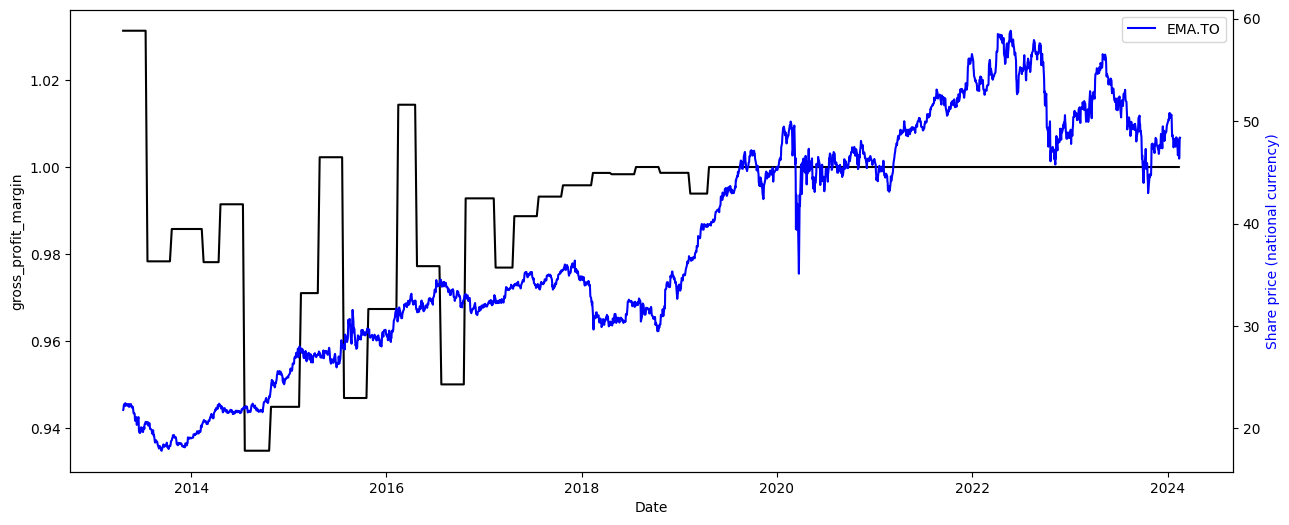

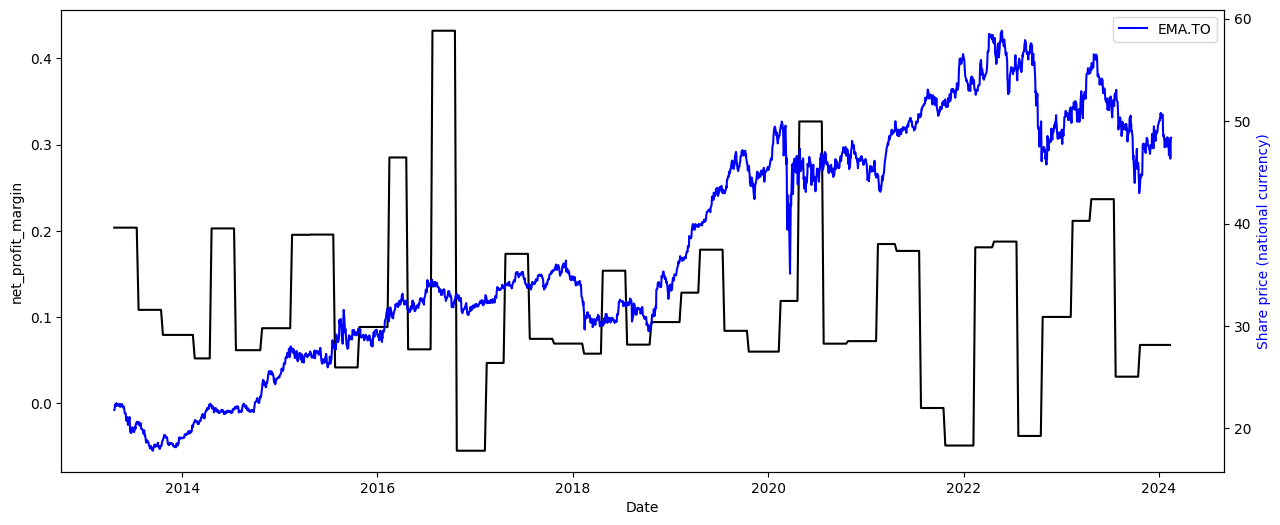

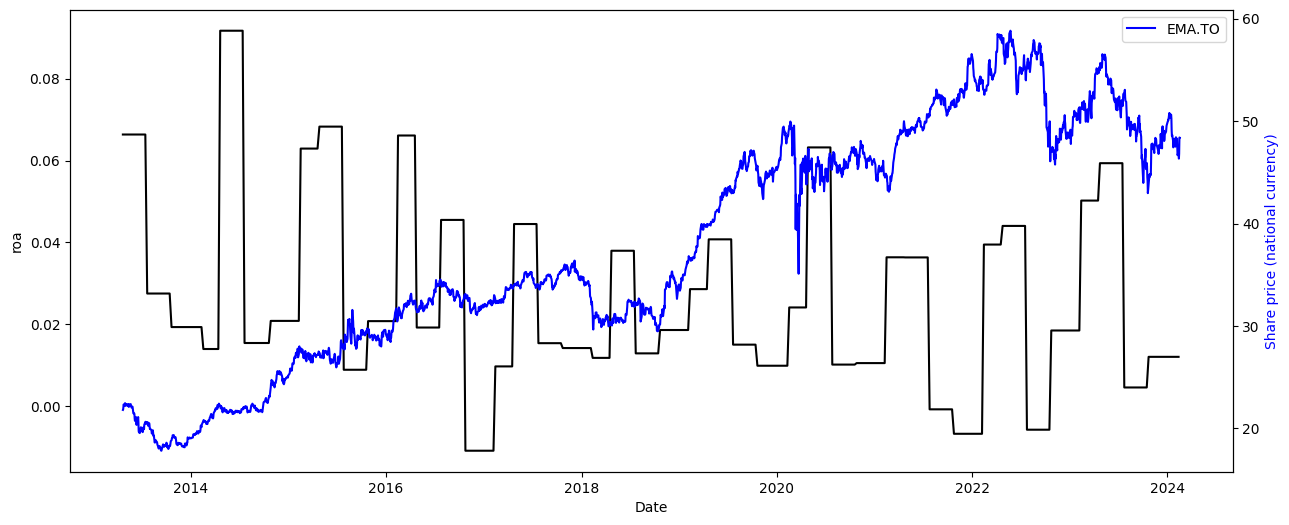

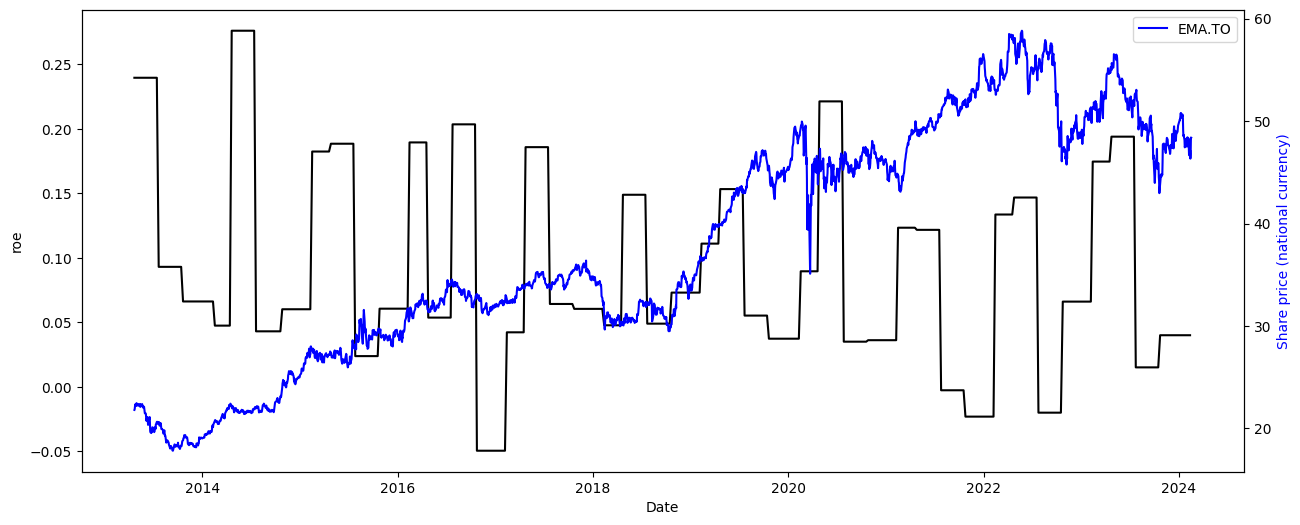

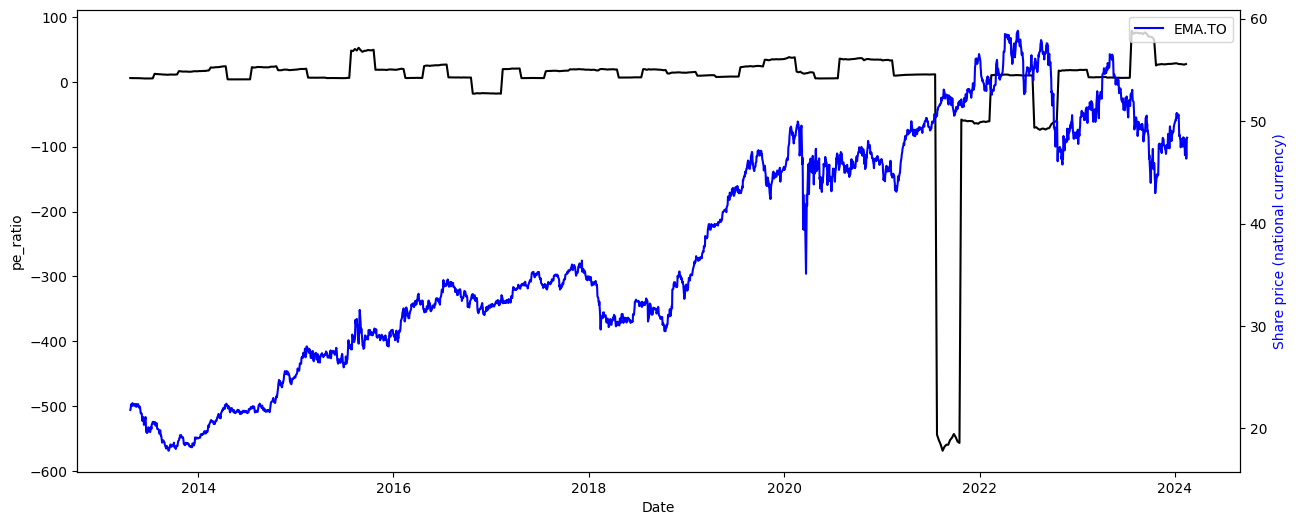

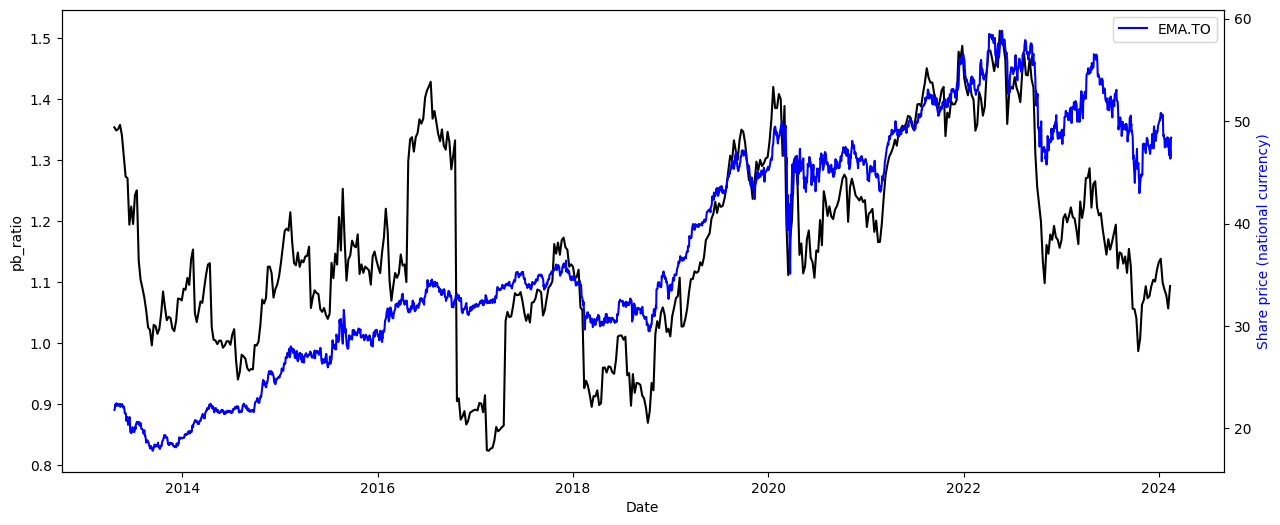

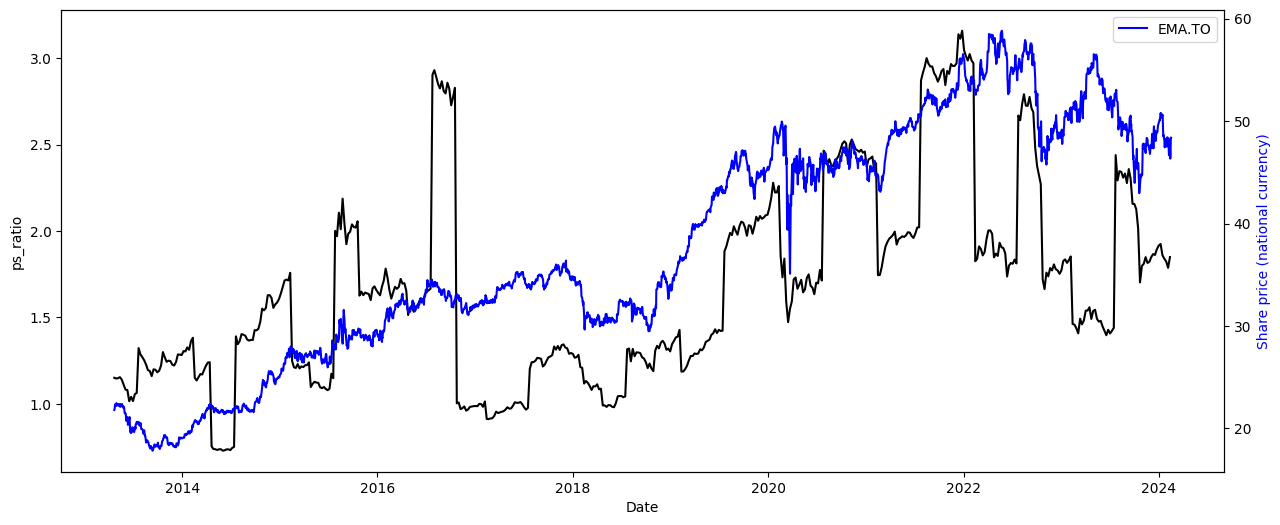

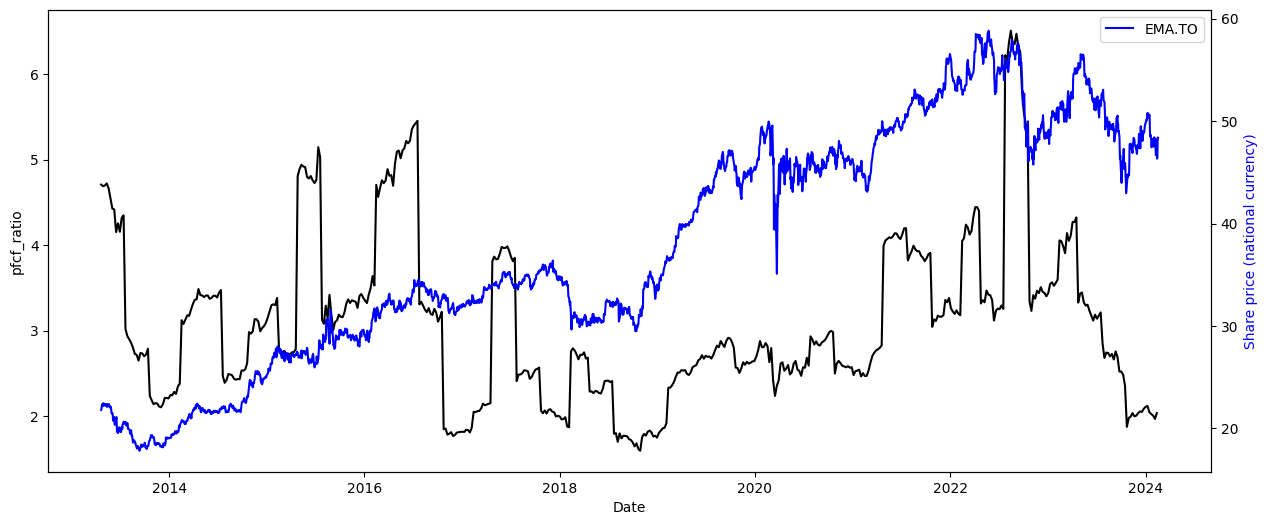

In [82]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(share_all_price.index, share_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

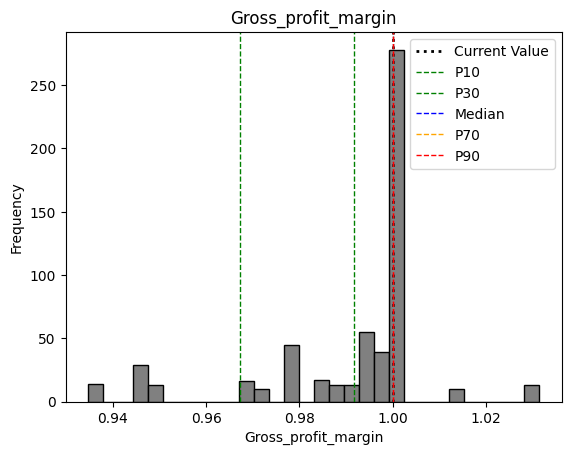

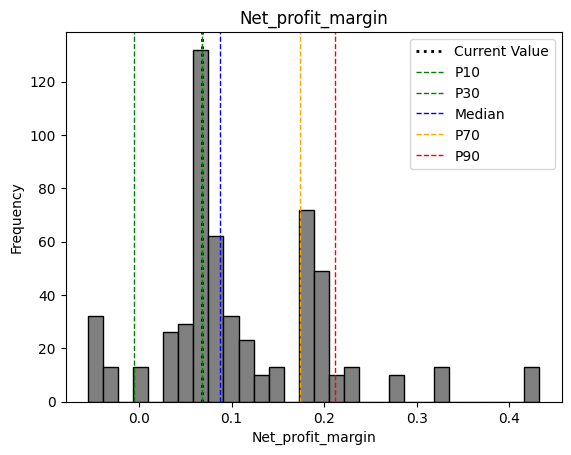

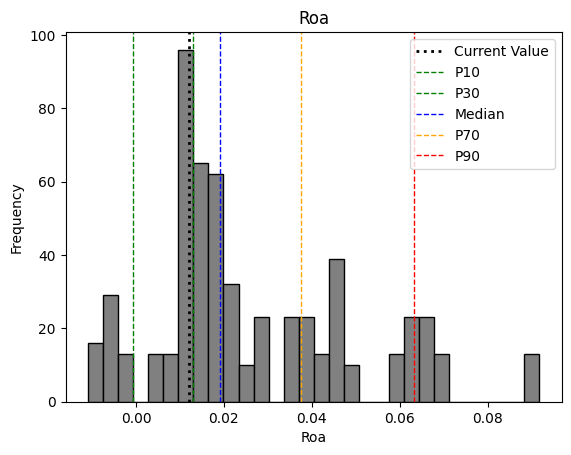

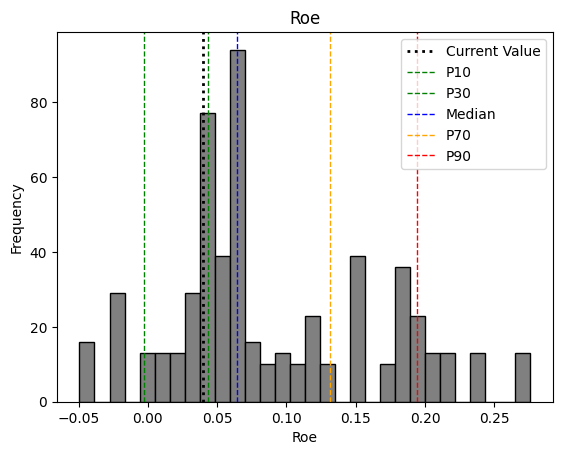

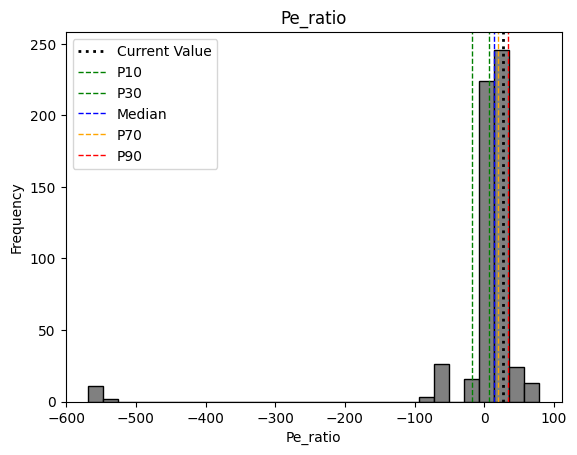

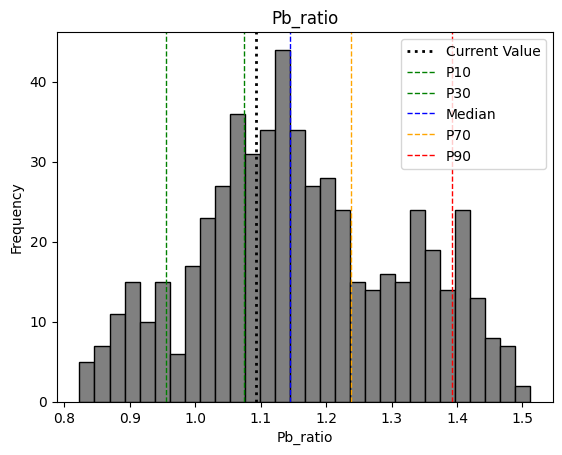

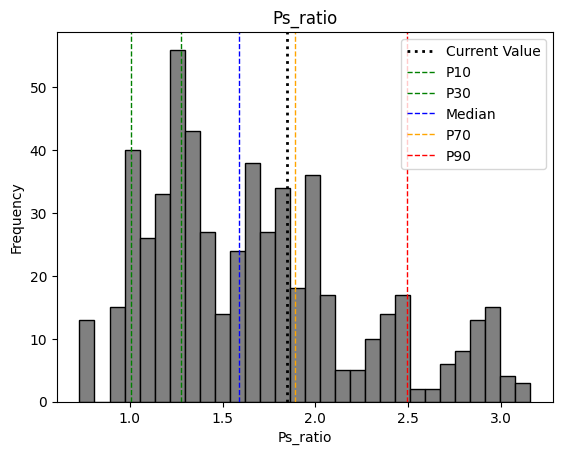

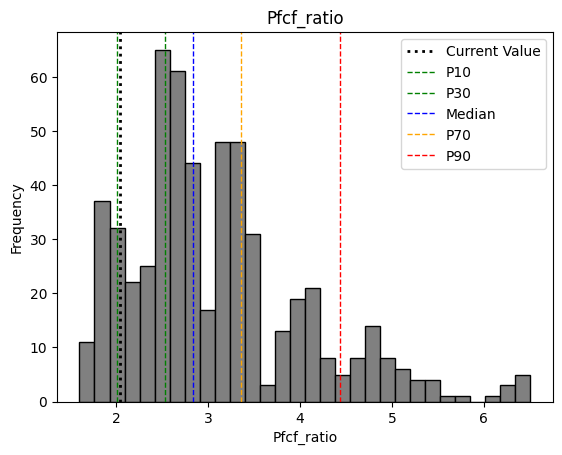

In [83]:
for column in merged_nat_curr.columns[-8:]:
    try:
        plt.hist(merged_nat_curr[column].values, bins=30, edgecolor='black', color='gray')
        plt.axvline(merged_nat_curr[column].iloc[-1], color='k', linestyle='dotted', linewidth=2, label='Current Value')
        plt.axvline(merged_nat_curr[column].quantile(0.1), color='green', linestyle='dashed', linewidth=1, label='P10')
        plt.axvline(merged_nat_curr[column].quantile(0.3), color='green', linestyle='dashed', linewidth=1, label='P30')
        plt.axvline(merged_nat_curr[column].quantile(0.5), color='blue', linestyle='dashed', linewidth=1, label='Median')
        plt.axvline(merged_nat_curr[column].quantile(0.7), color='orange', linestyle='dashed', linewidth=1, label='P70')
        plt.axvline(merged_nat_curr[column].quantile(0.9), color='red', linestyle='dashed', linewidth=1, label='P90')
        
        plt.xlabel(column.capitalize())
        plt.ylabel('Frequency')
        plt.title(column.capitalize())
        
        plt.legend()

        plt.show()
    except:
        print(column + " diagram is missing due to error.")

## Calculate correlation between value parameters

In [84]:
corr_matrix = pd.DataFrame(merged_nat_curr, columns=['real_date', 'gross_profit_margin', 'net_profit_margin', 'roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'pfcf_ratio'])
# find independent columns
corr_matrix.corr()

,real_date,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
real_date,1.000000,0.473621,-0.098775,-0.241111,-0.208141,-0.158525,0.424504,0.538987,0.022394
gross_profit_margin,0.473621,1.000000,0.023472,0.147096,0.155914,-0.121006,0.197680,0.008411,0.116812
net_profit_margin,-0.098775,0.023472,1.000000,0.849531,0.900689,0.205021,0.108095,-0.142425,0.167016
roa,-0.241111,0.147096,0.849531,1.000000,0.978966,0.174764,-0.005979,-0.402470,0.285893
roe,-0.208141,0.155914,0.900689,0.978966,1.000000,0.181047,0.015307,-0.378385,0.239252
pe_ratio,-0.158525,-0.121006,0.205021,0.174764,0.181047,1.000000,-0.290116,-0.359718,-0.214780
pb_ratio,0.424504,0.197680,0.108095,-0.005979,0.015307,-0.290116,1.000000,0.733756,0.543066
ps_ratio,0.538987,0.008411,-0.142425,-0.402470,-0.378385,-0.359718,0.733756,1.000000,0.245619
pfcf_ratio,0.022394,0.116812,0.167016,0.285893,0.239252,-0.214780,0.543066,0.245619,1.000000


In [85]:
tolerance = 0.2

In [86]:
#npm = merged_nat_curr[(merged_nat_curr['net_profit_margin']<= merged_nat_curr['net_profit_margin'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['net_profit_margin']>= merged_nat_curr['net_profit_margin'].iloc[-1] * (1- tolerance))]['date'].values
roe = merged_nat_curr[(merged_nat_curr['roe']<= merged_nat_curr['roe'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['roe']>= merged_nat_curr['roe'].iloc[-1] * (1- tolerance))]['date'].values
per = merged_nat_curr[(merged_nat_curr['pe_ratio']<= merged_nat_curr['pe_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pe_ratio']>= merged_nat_curr['pe_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pbr = merged_nat_curr[(merged_nat_curr['pb_ratio']<= merged_nat_curr['pb_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pb_ratio']>= merged_nat_curr['pb_ratio'].iloc[-1] * (1- tolerance))]['date'].values
psr = merged_nat_curr[(merged_nat_curr['ps_ratio']<= merged_nat_curr['ps_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['ps_ratio']>= merged_nat_curr['ps_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pfcfr = merged_nat_curr[(merged_nat_curr['pfcf_ratio']<= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pfcf_ratio']>= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1- tolerance))]['date'].values

In [87]:
#test3 =  utils.list_intersect(gpm, roe)
test4 =  utils.list_intersect(roe, per)
test5 =  utils.list_intersect(test4, pbr)
#test6 =  utils.list_intersect(test5, psr)
test7 =  utils.list_intersect(test5, pfcfr)
print(len(test7), 'timestemos have been found!')

31 timestemos have been found!


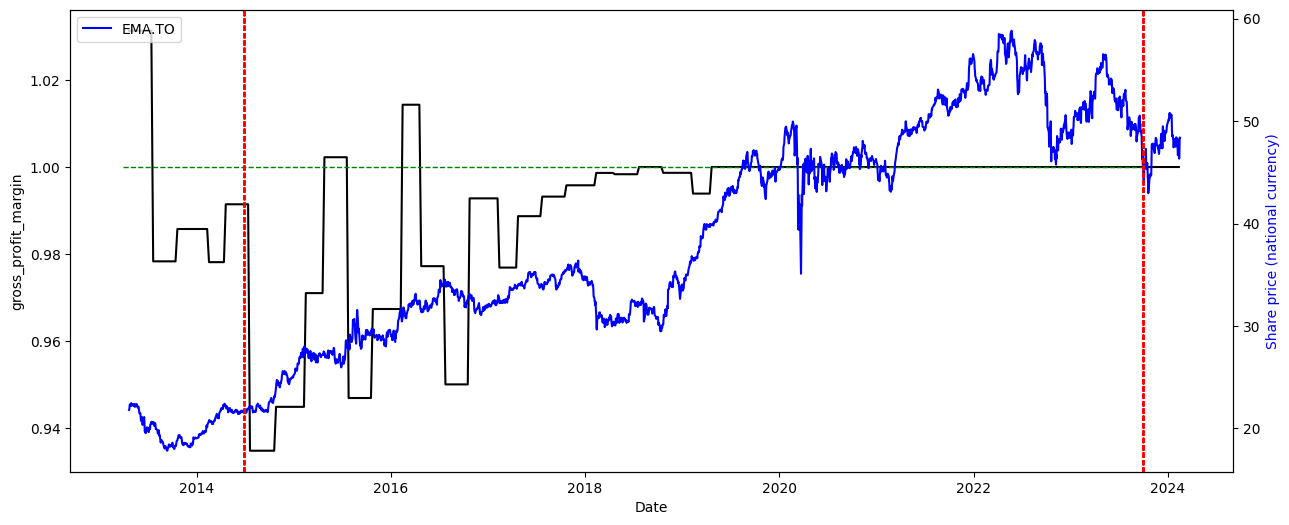

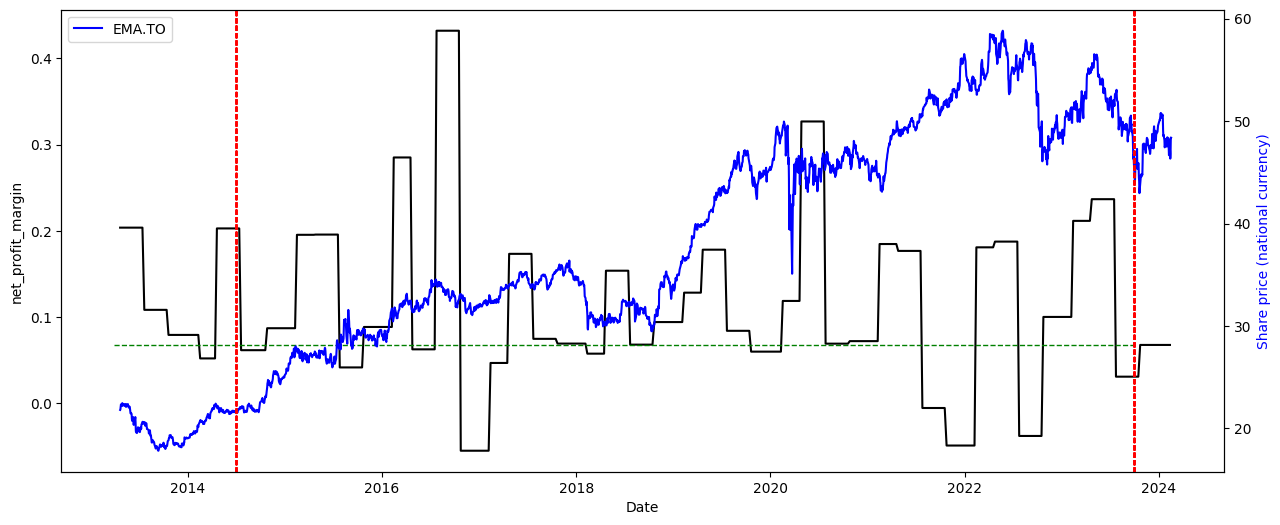

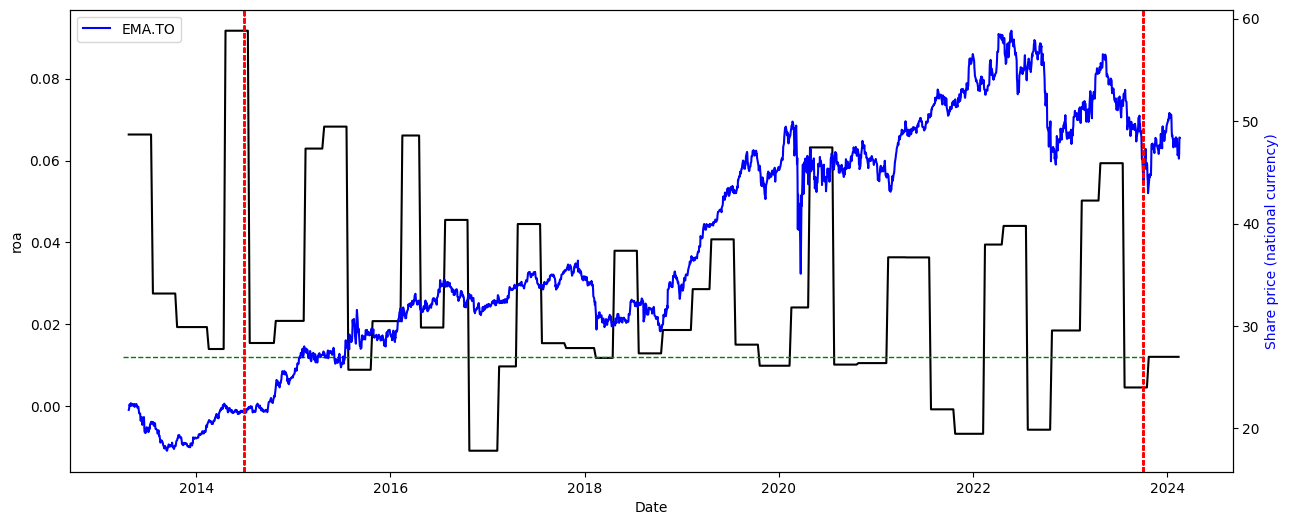

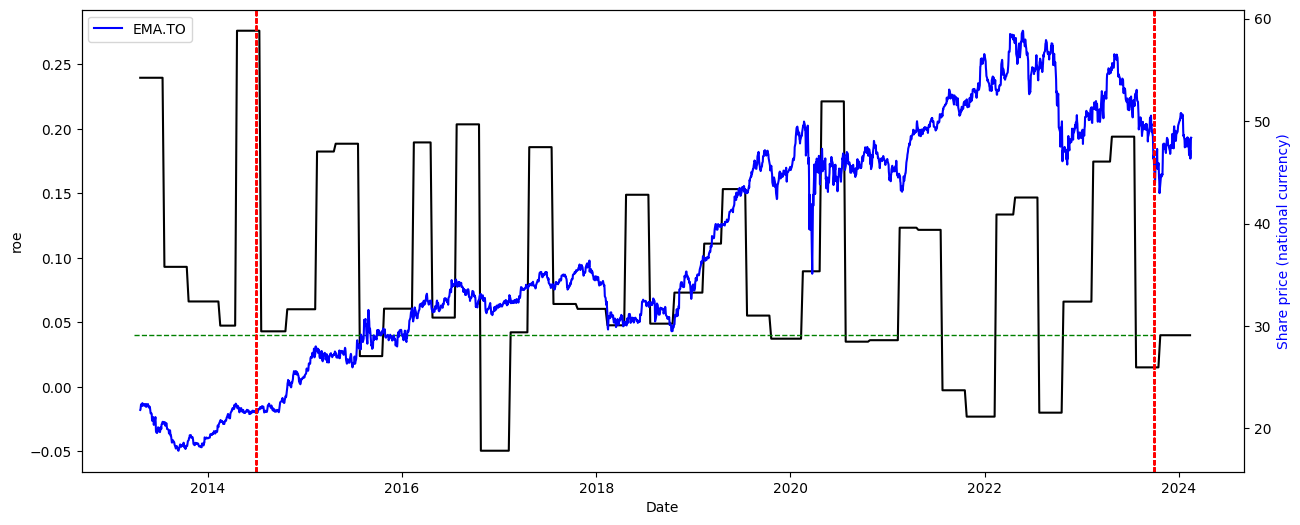

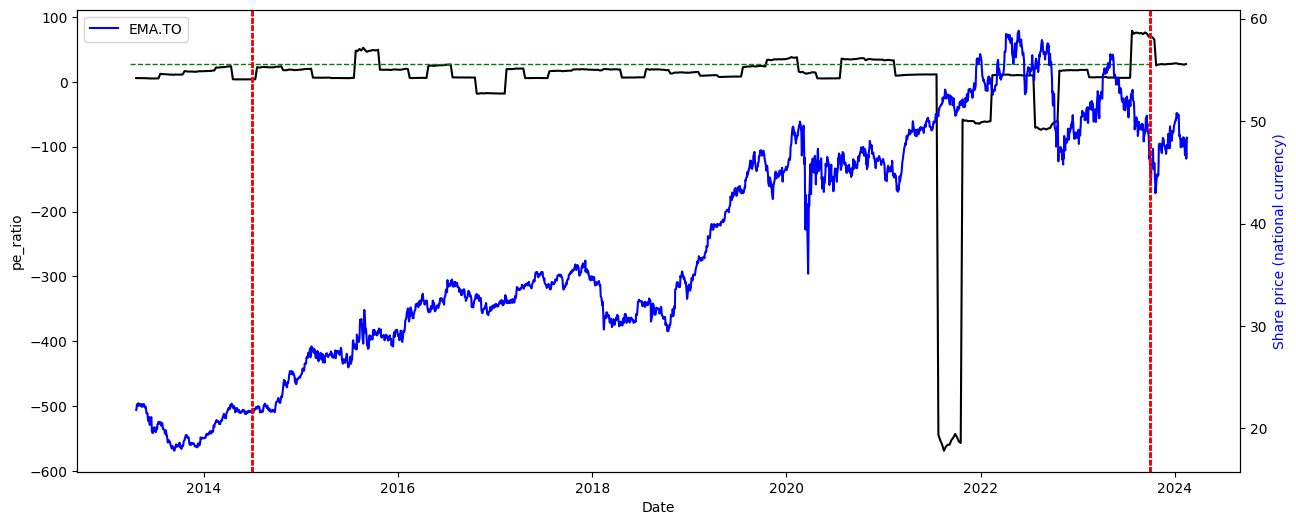

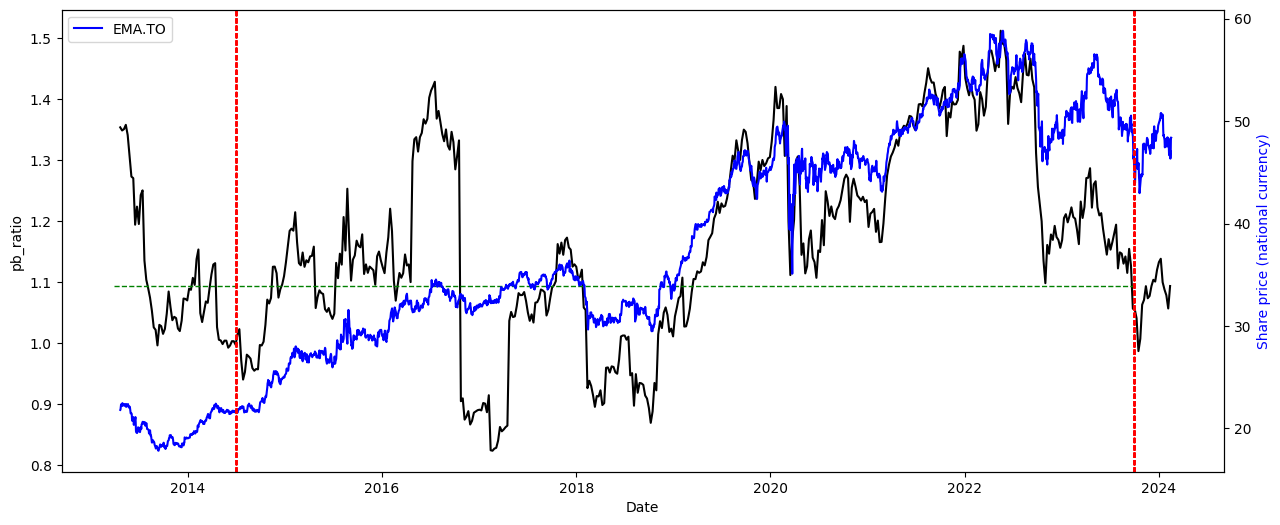

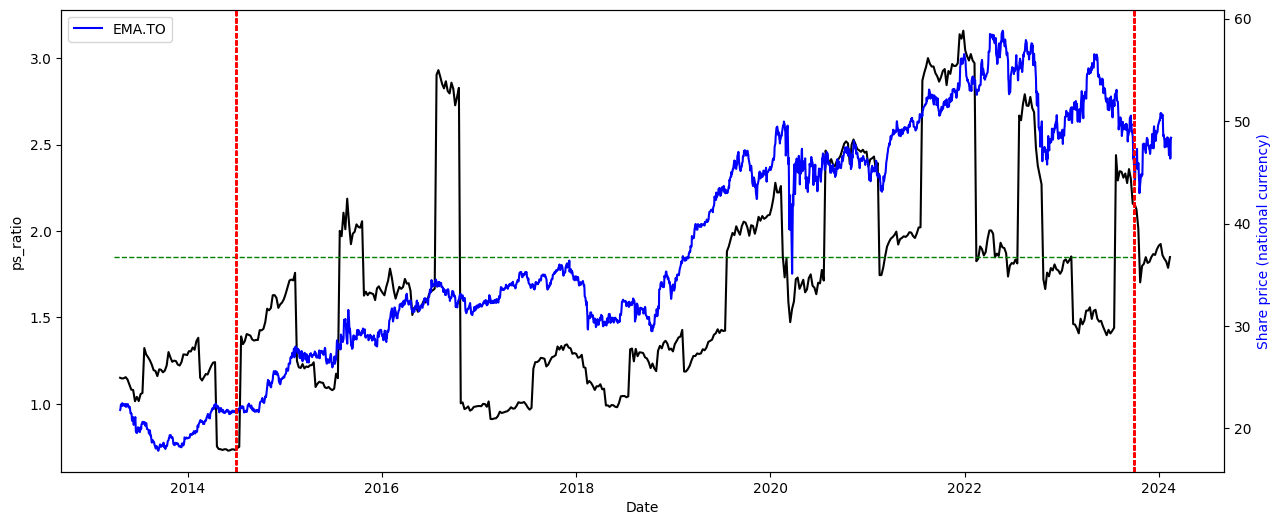

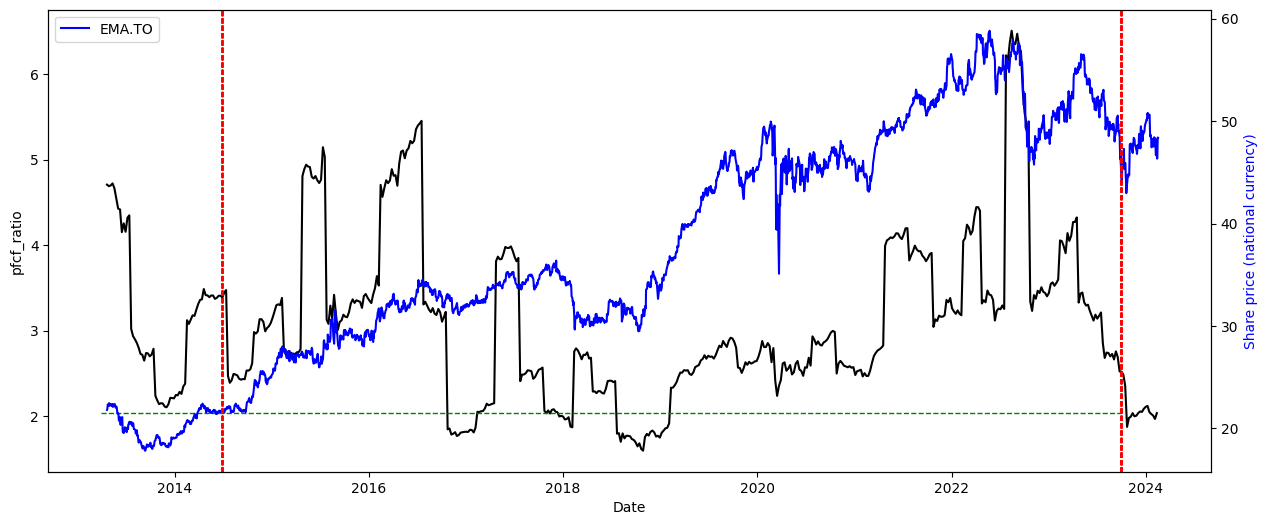

In [88]:
for column in merged_nat_curr.columns[-8:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(share_all_price.index, share_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    for timestamp in test7:
        plt.axvline(timestamp, color='red', linestyle='dashed', linewidth=1)

    ax1.hlines(
        y=merged_nat_curr[column].iloc[-1],
        xmin=merged_nat_curr.date.min(),
        xmax=merged_nat_curr.date.max(),
        linewidth=1, linestyles='dashed',
        color='green',
        )

    plt.legend()
    plt.show()